# Goal 

Goal of this kernel is to understand ROC_AUC_Curve

# Definitions

- TP = True Positive – The model predicted the positive class correctly, to be a positive class.
- FP = False Positive – The model predicted the negative class incorrectly, to be a positive class.
- FN = False Negative – The model predicted the positive class incorrectly, to be the negative class.
- TN = True Negative – The model predicted the negative class correctly, to be the negative class.

### Recall (Polnota):
Out of all the positive classes, how many instances were identified correctly.
(f.e. importnant than distinguish not-appropriate content, not much risky if useful content as well will be deleted, more important identify as much as possible target content)

- Recall = TP / (TP + FN)


### Precision:
Out of all the predicted positive instances, how many were predicted correctly.
(f.e. strike enemies plains - big mistake to strike your plain with enemies` ones)

- Precision = TP / (TP + FP)

### F-Score: 
F – Measure is nothing but the harmonic mean of Precision and Recall.
- F-Score = (2 * Recall * Precision) / (Recall + Precision)

# 2 Types of Error

- Type 1 Error: The model predicted the instance to be a Positive class, but it is incorrect. This is False Positive (FP).

- Type 2 Error: The model predicted the instance to be the Negative class, but is it incorrect. This is False Negative (FN).

# AUC-ROC-Curve

AUC–ROC curve is the model selection metric for bi–multi class classification problem. ROC is a probability curve for different classes. ROC tells us how good the model is for distinguishing the given classes, in terms of the predicted probability.

A typical ROC curve has False Positive Rate (FPR) on the X-axis and True Positive Rate (TPR) on the Y-axis.

The area covered by the curve is the area between the orange line (ROC) and the axis. This area covered is AUC. The bigger the area covered, the better the machine learning models is at distinguishing the given classes. Ideal value for AUC is 1.

## 1. Best Scenario

The graph above shows the Predicted Class Probability for both classes 0 and 1. The threshold is 0.5 which means, if the predicted probability of the class for an instance is less than 0.5, that instance is predicted to be an instance of class 0. If the probability of the class for an instance is equal or greater than 0.5, the instance is classified as the instance of class 1.

Text(0.5, 1.0, 'Best Split AUC_ROC')

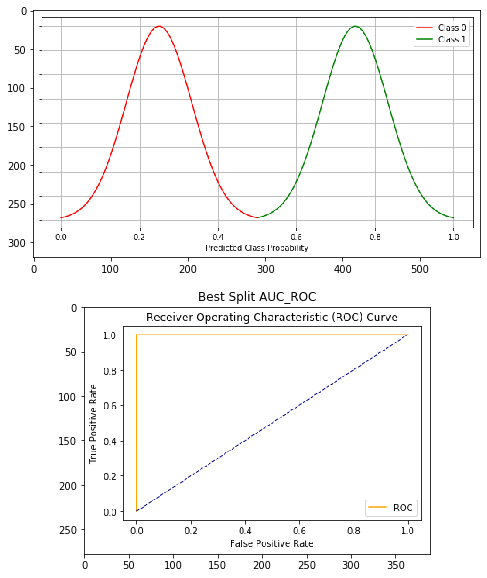

In [49]:
from PIL import Image
img = Image.open("hist_best.png")
img1 = Image.open("Curve_best.png")

fig=plt.figure(figsize=(22, 10))

rows = 2 # I added this
columns = 1 # and this

image=[img,img1]
for i in range(1, 3):
    fig.add_subplot(rows, columns, i)
    plt.imshow(image[i-1])
plt.title('Best Split AUC_ROC')

## 2. Random Guess Scenario

AUC is 0.5. In other words, our model is 50% accurate for instances and their classification. The model has no discrimination capabilities at all in this case. This is still not the worst model but it makes a random guess, much like a human would do.

Text(0.5, 1.0, 'Random Split AUC_ROC')

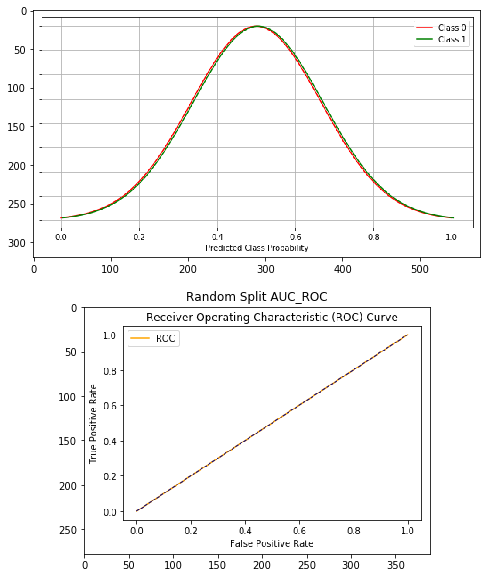

In [51]:
from PIL import Image
img = Image.open("hist_random.png")
img1 = Image.open("curve_random.png")

fig=plt.figure(figsize=(22, 10))

rows = 2 # I added this
columns = 1 # and this

image=[img,img1]
for i in range(1, 3):
    fig.add_subplot(rows, columns, i)
    plt.imshow(image[i-1])
plt.title('Random Split AUC_ROC')

## 3. Worst Scenario

In this case, all the instances of class 1 are misclassified as class 0 and all the instances of class 0 are misclassified as class 1. As a result, we get AUC to be 0, which the worst case scenario.

Text(0.5, 1.0, 'Worst Split AUC_ROC')

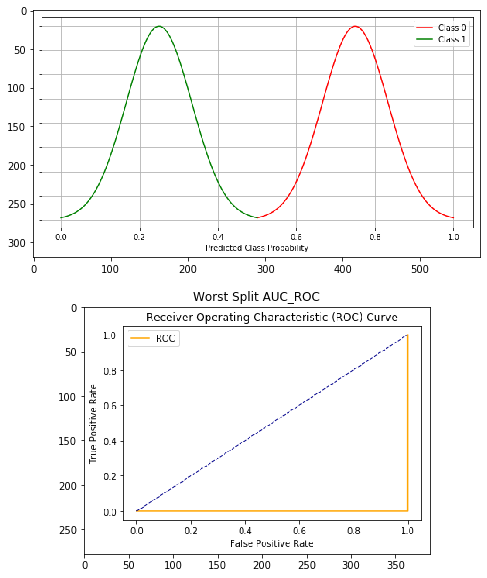

In [52]:
from PIL import Image
img = Image.open("hist_worst.png")
img1 = Image.open("curve_worst.png")

fig=plt.figure(figsize=(22, 10))

rows = 2 # I added this
columns = 1 # and this

image=[img,img1]
for i in range(1, 3):
    fig.add_subplot(rows, columns, i)
    plt.imshow(image[i-1])
plt.title('Worst Split AUC_ROC')

## 4.Industry / Norm Scenario

We have some overlapping and that introduces Type 1 and Type 2 errors to the model prediction. In this case we get AUC to be somewhere between 0.5 and 1.

Text(0.5, 1.0, 'Best Split AUC_ROC')

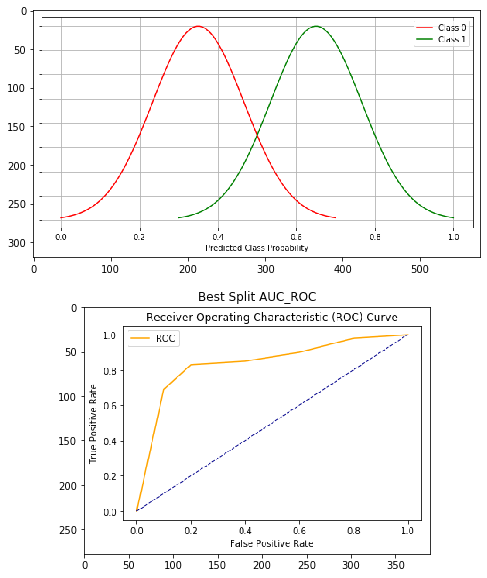

In [53]:
from PIL import Image
img = Image.open("hist_norm.png")
img1 = Image.open("Curve_norm.png")

fig=plt.figure(figsize=(22, 10))

rows = 2 # I added this
columns = 1 # and this

image=[img,img1]
for i in range(1, 3):
    fig.add_subplot(rows, columns, i)
    plt.imshow(image[i-1])
plt.title('Best Split AUC_ROC')

# Python

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [5]:
# plot curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

AUC: 0.96


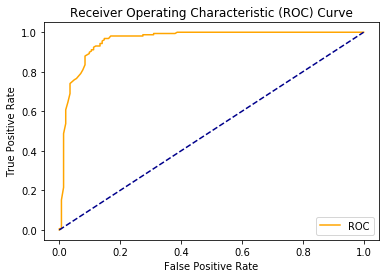

In [6]:
# Generate data
data_X, class_label = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
#Split
trainX, testX, trainy, testy = train_test_split(data_X, class_label, test_size=0.3, random_state=1)
#fit
model = RandomForestClassifier()
model.fit(trainX, trainy)
# Predicr Probabilities
probs = model.predict_proba(testX)
# only posit class
probs = probs[:, 1]
# auc score
auc = roc_auc_score(testy, probs)
print('AUC: %.2f' % auc)
#roc_curve -true pos rate, false posit eate
fpr, tpr, thresholds = roc_curve(testy, probs)
# def plot
plot_roc_curve(fpr, tpr)


# Conclusion
AUC-ROC curve is one of the most commonly
used metrics to evaluate the performance of machine learning algorithms particularly in the cases where we have imbalanced datasets. In this article we see ROC curves and its associated concepts in detail. Finally, we demonstrated how ROC curves can be plotted using Python.